In [1]:
import pandas as pd
import importlib
import pytae
importlib.reload(pytae)
pt = pytae.Plotter()
# Example usage (prototype phase):
df = pd.DataFrame({
    'x1': ['A', 'B', 'C', 'D', 'E'],
    'x2': ['F', 'G', 'H', 'I', 'J'],
    'y1': [1, 2, 3, 2, 3],
    'y2': [5, 4, 6, 5, 7],
    'z': ['Type1', 'Type1', 'Type1', 'Type1', 'Type1']
})


df2 = pd.DataFrame([[5.1, 3.5, 'a'], [4.9, 3.0, 'a'], [7.0, 3.2, 'c'],
                   [6.4, 3.2, 'd'], [5.9, 3.0,'e']],
                  columns=['length', 'width', 'species'])


df2

,length,width,species
0,5.1,3.5,a
1,4.9,3.0,a
2,7.0,3.2,c
3,6.4,3.2,d
4,5.9,3.0,e


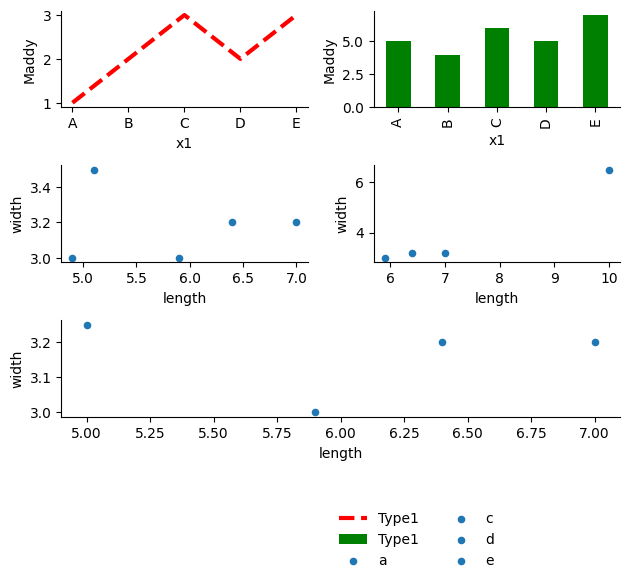

In [2]:
style={'Type1':'--'}
width={'Type1':3}

mosaic = """
AB
CD
EE
"""
k = pytae.Plotter(mosaic)

(k
.data(df)
.plot(x='x1', 
       y='y1',
       by='z',
       dropna=False,
       color='red',style=style,width=width,
       on='A',ylabel='Maddy')
.plot(y='y2',
       by='z',
       dropna=False,
       kind='bar',
       color='green',
       on='B')
.data(df)
# .plot(x='x1', 
#        y='y1',
#        by='z',
#        dropna=False,
#        color='red',
#        on='D')
# .plot(x='x2',
#     y='y2',
#        by='z',
#        dropna=False,
#        kind='bar',
#        color='green',
#        on='C')

.data(df2)
.plot(x='length',y='width',kind='scatter',on='C',by='species')
.plot(on='D',aggfunc='sum')
.plot(on='E',aggfunc='mean')
.finalize(consolidate_legends=True,ncols=2)
)

k.fig


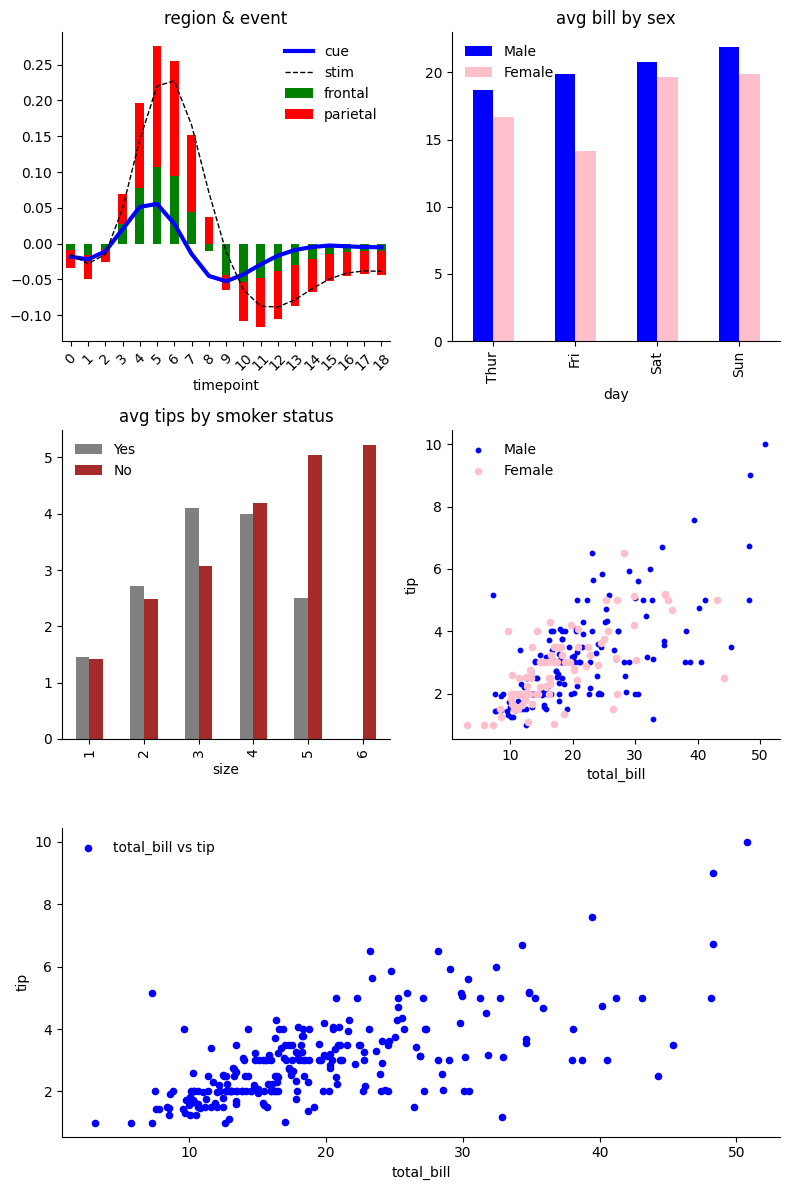

In [8]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
tips = sns.load_dataset("tips")

import pytae as pt

color={'cue': 'blue', 'stim': 'black', 'parietal': 'red',
       'frontal': 'green','Male':'blue','Female':'pink','Dinner':'green',
       'Lunch':'orange','Yes':'grey','No':'brown'}
style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}
marker = {'Male': 'o', 'Female': 'x'}
size={'Male': 10,'Female': 20}

mosaic = """
AB
CD
EE
"""

k = pt.Plotter(mosaic,figsize=(8, 12))
(k
.data(fmri)
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',color=color,style=style,width=width,
      on='A',title='region & event',rot=45)
.plot(by='region',kind='bar',stacked=True,on='A')
.data(tips)
.plot(x='day',y='total_bill',by='sex',aggfunc='mean',on='B',kind='bar',color=color,
      title='avg bill by sex')
.plot(x='size',y='tip',by='smoker',on='C',kind='bar',color=color,title='avg tips by smoker status')
.data(tips)
# .plot(kind='scatter',x='total_bill',y='tip',on='D',by='sex',color=color,marker=marker,title='total bill vs tip')
.plot(kind='scatter',x='total_bill',y='tip',on='E')
.plot(kind='scatter',x='total_bill',y='tip',on='D',by='sex',color=color,s=size,aggfunc=None)
# .finalize(consolidate_legends=True,ncols=4)
.finalize()
)
k.fig

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


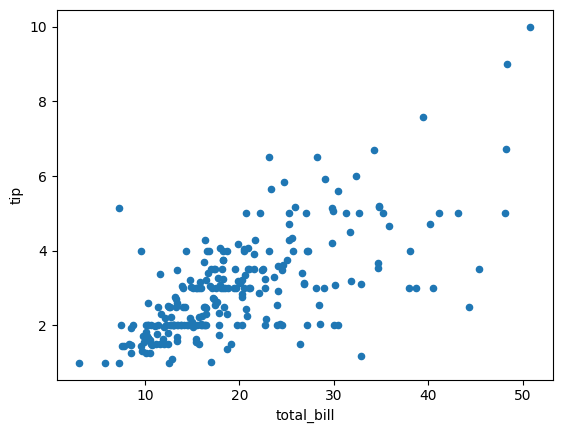

In [4]:
import matplotlib.pyplot as plt
tips.plot(kind='scatter',x='total_bill',y='tip') 
tips

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


      sex  total_bill     tip
0    Male     3256.82  485.07
1  Female     1570.95  246.51


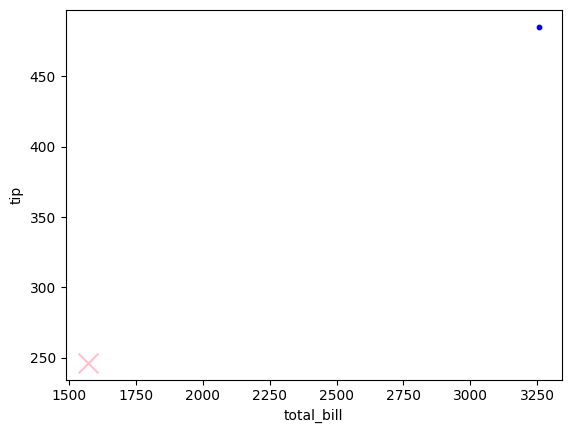

In [6]:
import matplotlib.pyplot as plt

x='total_bill'
y='tip'
by='sex'
aggfunc='sum'
df=tips.copy()
color_dict=color
marker_dict=marker
size_dict={'Male':10,'Female':200}

fig, ax = plt.subplots()  # Create a new figure and axis
plt.close()

# Select only the relevant columns from the DataFrame
df = df[[x, y, by]]

if aggfunc:
    df = df.groupby(by, observed=True).agg({x: aggfunc, y: aggfunc}).reset_index()
    print(df)

for l, group_df in df.groupby(by, observed=True):
    group_df.plot(ax=ax, x=x,y=y,kind='scatter',marker=marker_dict[l],
                                                  color=color_dict[l],
                                                  s=size_dict[l]) 
                                

    

fig


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def _plot_scatter(df, x=None, y=None, by=None, aggfunc=None, **kwargs):

    fig, ax = plt.subplots()  # Create a new figure and axis
    
    # Select only the relevant columns from the DataFrame
    df = df[[x, y, by]]
    
    # If an aggregation function is provided, group by 'by' and aggregate
    if aggfunc:
        df = df.groupby(by, observed=True).agg({x: aggfunc, y: aggfunc}).reset_index()
    
    # Extract customization parameters from kwargs
    colors = kwargs.pop('colors', {})
    markers = kwargs.pop('markers', {})
    
    # Plot each group separately, applying custom colors and markers
    for label, group_df in df.groupby(by, observed=True):
        # Create a dictionary of keyword arguments for this group
        scatter_kwargs = {**kwargs, 'label': label}
        
        # Apply specific color and marker for this group if provided
        scatter_kwargs['color'] = colors.get(label, 'grey')
        scatter_kwargs['marker'] = markers.get(label, 'o')
        
        # Plot the scatter plot with the given keyword arguments
        ax.scatter(group_df[x], group_df[y], **scatter_kwargs)
    
    # Set labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title('Scatter Plot')
    

    ax.legend()

    # Handle additional kwargs (if any)
    # Add any additional plotting adjustments or styling here
    
    # Print or copy data if requested
    if 'print_data' in kwargs and kwargs['print_data']:
        print(df)
    if 'clip_data' in kwargs and kwargs['clip_data']:
        df.to_clipboard(index=False)
    
    plt.close(fig)  # Close the plot to prevent automatic display in some environments
    
    return fig

# Example usage
# Load example data
tips = sns.load_dataset('tips')

# Define custom colors and markers
custom_colors = {'Male': 'blue', 'Female': 'red'}
custom_markers = {'Male': 'o', 'Female': '^'}

# Create and display the plot
fig = _plot_scatter(tips, 
                    , aggfunc=None, colors=custom_colors, markers=custom_markers,label=True)

fig


SyntaxError: invalid syntax (2685494811.py, line 63)

In [ ]:
tips